# World Wide Exploratory Data Analysis of the Covid-19 Vaccination 

## 1. Aims, Objectives, and Backgorund
### 1.1. Introduction
### 1.2. Aims and Objectives
Within this project, I would like to explore the following:
- 
## 2. Dataset and Methods
In this research,I have used the COVID-19 World Vaccination Progress datasetCitation16 available at Kaggle that tracks the Daily and Total Vaccination for COVID-19 in the World. However, COVID-19 World Vaccination Progress datasets is collected, merged, and updated regularly from [Our World in Data GitHub repository](https://github.com/owid/covid-19-data). This dataset tracks the total number of COVID-19 vaccinations administered in each country. These data are compiled from official sources, including health ministries, government reports and official social media accounts.
### 2.1. Data Preparation
One of the important properties of EDA before finding the insight from the data is to clean and prepare the data according to the requirements. The dataset contains few “NaN” (not a number) values, some empty rows (having value 0), along with some redundant columns.

For data ingestion, visualization, and analysis purpose I initialized different python packages including [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/), and [Plotly](https://plotly.com/).

In [254]:
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
vaccinations = pd.read_csv("dataset/country_vaccinations.csv")
#vaccinations = pd.read_csv("vaccinations.csv")
#manufacturers = pd.read_csv("dataset/country_vaccinations_by_manufacturer.csv")
vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


We can using and configuring the function of df.drop from pandas library, we changed “NaN” values to 0 and removed the entire row as per our requirements. 

In [270]:
vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [271]:
vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [272]:
vaccinations.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


In [273]:
vaccinations.shape

(86512, 15)

In [274]:
vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [275]:
vaccinations['country'].value_counts()

Norway                             482
Latvia                             480
Denmark                            476
United States                      471
Russia                             470
                                  ... 
Bonaire Sint Eustatius and Saba    146
Tokelau                            114
Saint Helena                        92
Pitcairn                            85
Falkland Islands                    67
Name: country, Length: 223, dtype: int64

In [276]:
vaccinations['total_vaccinations'].value_counts()

0.0          121
39224.0       17
70229.0       13
70336.0       13
43159.0       11
            ... 
56536.0        1
57646.0        1
58756.0        1
59050.0        1
9039729.0      1
Name: total_vaccinations, Length: 42828, dtype: int64

### 2. Data Cleaning
We deleted missing value using dropna() method. For the dataset contains few “NaN” (not a number) values, changed “NaN” values to 0, we used fillna() method to replace the NULL values with our specified values.

In [277]:
#Finding the null entries
vaccinations.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [278]:
#Dropping missing values in dataframe

clean_data=vaccinations.dropna()
clean_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [279]:
#Changing NaN to 0
clean_data = vaccinations.fillna(0)

In [280]:
clean_data.duplicated().sum()

0

In [281]:
clean_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


### 2.3. Data Visualization and Analysis
For data visualization, I used seaborn and plotly packages.


In [282]:
new_df = clean_data.groupby(["country",'iso_code','vaccines'])['total_vaccinations','people_vaccinated',
                                                               'people_fully_vaccinated','daily_vaccinations',
                                                               'total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                                               "people_fully_vaccinated_per_hundred",
                                                               'daily_vaccinations_per_million'].max().reset_index()
new_df.head()

C:\Users\LENOVO Series\AppData\Local\Temp\ipykernel_19992\925974619.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df = clean_data.groupby(["country",'iso_code','vaccines'])['total_vaccinations','people_vaccinated',


,country,iso_code,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",5751015.0,5082824.0,4420127.0,70761.0,14.44,12.76,11.10,1776.0
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2754244.0,1278902.0,1215199.0,17565.0,95.87,44.52,42.30,6114.0
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",13704895.0,7461932.0,6110712.0,256927.0,30.72,16.72,13.70,5759.0
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",151997.0,57817.0,53367.0,1762.0,196.50,74.74,68.99,22778.0
4,Angola,AGO,Oxford/AstraZeneca,17535411.0,11235059.0,5993792.0,183173.0,51.68,33.11,17.66,5398.0


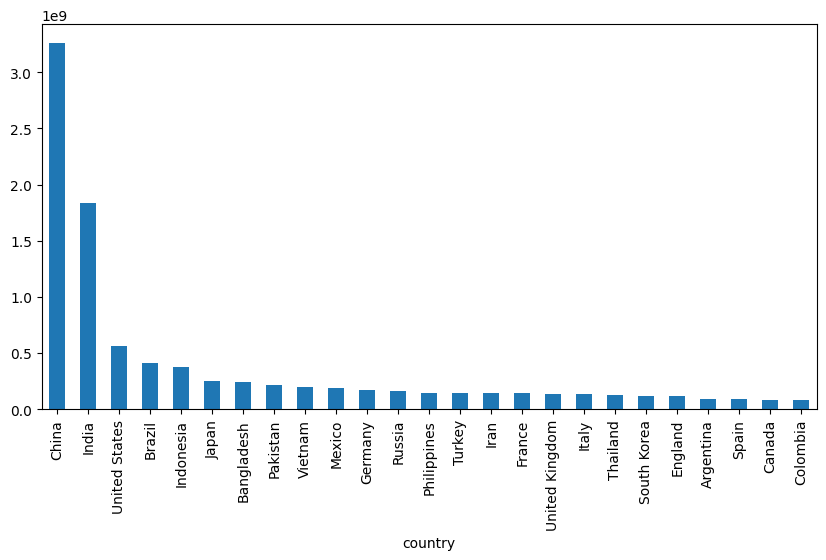

In [293]:
plt.figure(figsize=(10,5))
clean_data.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)[:25].plot(kind="bar")
plt.show()

## 3. Results

## 4. Conclusions

## References

<div class="csl-entry">Dey, S. K., Rahman, M. M., Siddiqi, U. R., Howlader, A., Tushar, M. A., &#38; Qazi, A. (2022). Global landscape of COVID-19 vaccination progress: insight from an exploratory data analysis. In <i>Human Vaccines and Immunotherapeutics</i> (Vol. 18, Issue 1). Taylor and Francis Ltd. https://doi.org/10.1080/21645515.2021.2025009</div>

Hale, T., Angrist, N., Goldszmidt, R. et al. A global panel database of pandemic policies (Oxford COVID-19 Government Response Tracker). Nat Hum Behav 5, 529–538 (2021). https://doi.org/10.1038/s41562-021-01079-8


Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Nat Hum Behav (2021). https://doi.org/10.1038/s41562-021-01122-8